## #1 import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# scientific ploting lib 
import matplotlib.pyplot as plt
# allow plots appear with in notebook
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.model_selection import GridSearchCV


 ## #2.Importing the Dataset

In [2]:
df=pd.read_csv("heart_dataset.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [4]:
# df['age'].unique()


 ## #3 Preprocessing

  #Taking care of missing values and duplicate values

In [5]:
print("Null checking:",dict(df.isna().sum()))
print("Null checking1:",dict(df.isna().any()))
print("Duplicate checking:",df.duplicated().any())

Null checking: {'age': 0, 'sex': 0, 'cp': 0, 'trestbps': 0, 'chol': 0, 'fbs': 0, 'restecg': 0, 'thalach': 0, 'exang': 0, 'oldpeak': 0, 'slope': 0, 'ca': 0, 'thal': 0, 'target': 0}
Null checking1: {'age': False, 'sex': False, 'cp': False, 'trestbps': False, 'chol': False, 'fbs': False, 'restecg': False, 'thalach': False, 'exang': False, 'oldpeak': False, 'slope': False, 'ca': False, 'thal': False, 'target': False}
Duplicate checking: False


In [6]:
df.dropna().shape

(302, 14)

<AxesSubplot:>

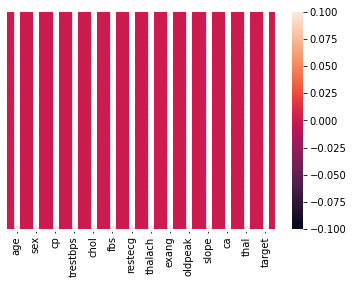

In [7]:
# visualizing null checking
sns.heatmap(df.isnull(),yticklabels=False,annot=True)

#Get info about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#Get over all  statistic of dataset

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

In [11]:
df.sample(5,random_state=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
225,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
152,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
228,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
201,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
52,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


### #4. Training and Testing Dataset

In [12]:
x=df.drop(columns='target')
y=df.target
print(x.shape,y.shape)

(302, 13) (302,)


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

### #5. Feature Scaling

In [14]:
st=StandardScaler()
# x_train and x_test feature scaling
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

x_train


array([[ 0.31376524,  0.67216607, -0.94847216, ..., -0.62675024,
        -0.69655732, -2.18635633],
       [-0.02082513,  0.67216607, -0.94847216, ..., -0.62675024,
         0.31470963,  1.09658371],
       [-1.24765647,  0.67216607, -0.94847216, ..., -0.62675024,
        -0.69655732, -0.54488631],
       ...,
       [-0.24388537,  0.67216607, -0.94847216, ...,  0.98013069,
         0.31470963,  1.09658371],
       [ 1.42906646,  0.67216607,  0.98866165, ..., -0.62675024,
        -0.69655732,  1.09658371],
       [-1.47071671, -1.48772757,  0.02009475, ...,  0.98013069,
         0.31470963, -0.54488631]])

 ### #6 Algorthims training(model prepartion)

#### KNNClassifier

In [15]:
knn=KNeighborsClassifier()

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

#### accuracy on Testing data of KNN classifier 

In [17]:
y_pred=knn.predict(x_test)

In [18]:
accuracy_score(y_test,y_pred)

0.8688524590163934

#### accuracy on training data of KNN classifier 

In [19]:
x_train_pred=knn.predict(x_train)

In [20]:
accuracy_score(y_train,x_train_pred)

0.8506224066390041

In above accuracy of KNN of both trainig data and testing data almost similar each other.if their is wide difference then the model is overfitting i.e. the acc_score of train data is very  large and the accura_score of test data is very small

### Hyperparameter Optimization

In [21]:
# help(knn)

Finding optimal K value for KNN

In [22]:

import array as arr
score=[]
k_range=range(1,39)
for k in k_range:
    knn_check=KNeighborsClassifier(n_neighbors=k)
    knn_check.fit(x_train,y_train)
    y_predict=knn_check.predict(x_test)
    score.append(accuracy_score(y_test,y_predict))
# print(score)

max_val=None
max_idx=None
for idx,num in enumerate(score):
    if(max_idx is None or num>max_val):
        max_val=num
        max_idx=idx+1
print("max:",max_val,"at index:",max_idx)

max: 0.9180327868852459 at index: 8


Text(0, 0.5, 'Testing Accuracy')

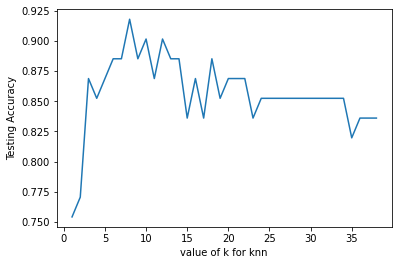

In [23]:
plt.plot(k_range,score)
plt.xlabel("value of k for knn")
plt.ylabel("Testing Accuracy")

In [24]:
# best K value
knn_mod=KNeighborsClassifier(n_neighbors=8)
knn_mod.fit(x_train,y_train)
y_pred3=knn_mod.predict(x_test)
accuracy_score(y_test,y_pred3)

0.9180327868852459

In [25]:
# accuracy on traing data
x_train_pred1=knn_mod.predict(x_train)

In [26]:
accuracy_score(y_train,x_train_pred1)

0.8713692946058091

 Tune many hyperparameters together using sklearn GridSearchCv

In [50]:

knn_grid=KNeighborsClassifier()

k=np.arange(1,40) # default=5
metrics=   ['euclidean','manhattan']
weights=   ['uniform', 'distance']


param_grid=dict(n_neighbors=k,metric=metrics,weights=weights)
grid_search=GridSearchCV(knn_grid,param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']})

In [28]:
# grid_search.cv_results_
# pd.DataFrame(grid_search.cv_results_)[["mean_test_score","std_test_score","params"]]

In [29]:
print("best score:",grid_search.best_score_)
print("best param:",grid_search.best_params_)
print("best estimator:",grid_search.best_estimator_)

best score: 0.8463435374149662
best param: {'metric': 'manhattan', 'n_neighbors': 34, 'weights': 'uniform'}
best estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=34)


### # model  saving  

In [30]:
import joblib as jb
import pickle as pk

In [31]:
# using pickle lib
pk.dump(knn_mod,open("model/knn_heart_model.pkl",'wb'))

In [32]:
pkl_knn_model=pk.load(open('model/knn_heart_model.pkl','rb'))
pkl_knn_model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [33]:
# using joblib
jb.dump(knn_mod,'heart_model.jb')

['heart_model.jb']

In [34]:
df.sample(5,random_state=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
173,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
88,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
163,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
242,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
110,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1


### single data prediction 


In [35]:
import numpy as np
# ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

input_data=[[59,1,3,160,273,0,0,125,0,0.0,2,0,2]]
# input_data=[[68,0,2,120,211,0,0,115,0,1.5,1,0,2]]
# input_data=[[44,0,2,108,141,0,1,175,0,0.6,1,0,2]]\
result = pkl_knn_model.predict(st.transform(input_data))
if result== [0]:
    print("person not heart disease")
else:
    print("person have heart disease ")



person not heart disease


C:\Users\Amexo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


###  #7 Data visualization

In [36]:
# df.age.unique().shape

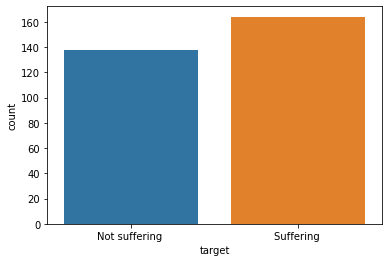

In [37]:
# counting dataset visualizatiuon
sns.countplot(x="target",data=df)
plt.xticks([0,1],["Not suffering ","Suffering "])
plt.show()

#Gender Distribution according to target

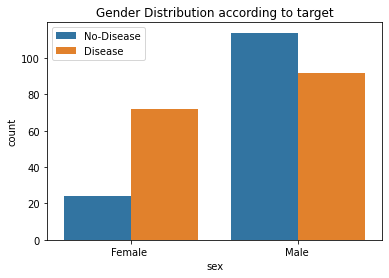

In [38]:
sns.countplot(x="sex",hue="target", data=df)
plt.xticks([0,1],["Female ","Male "])
plt.legend(labels=["No-Disease","Disease"])
plt.title("Gender Distribution according to target")
plt.show()

#Age Distribution according to target

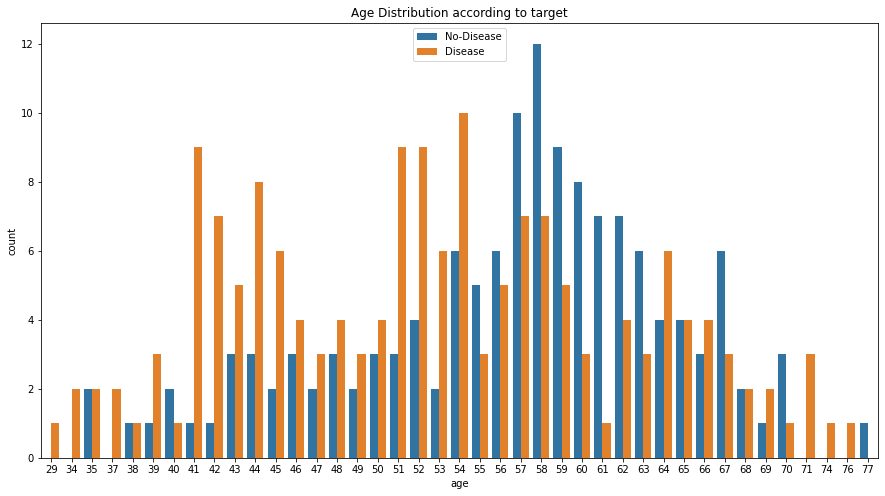

In [39]:
plt.figure(figsize=(15,8))
sns.countplot(x="age",hue="target", data=df)
plt.legend(labels=["No-Disease","Disease"])
plt.title("Age Distribution according to target")
plt.show()

#Visualization of Chest pain type

0 = typical angina

1 = atypical angina

2 = non — anginal pain

3 = asymptotic


In [40]:
df["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

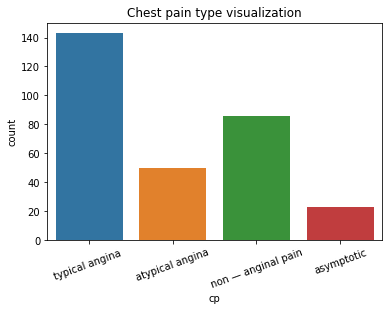

In [41]:
sns.countplot(x="cp",data=df)
plt.xticks([0,1,2,3],["typical angina ","atypical angina","non — anginal pain","asymptotic"])
plt.title("Chest pain type visualization")
plt.xticks(rotation=20)
plt.show()

#Chest Pain Distribution according to target

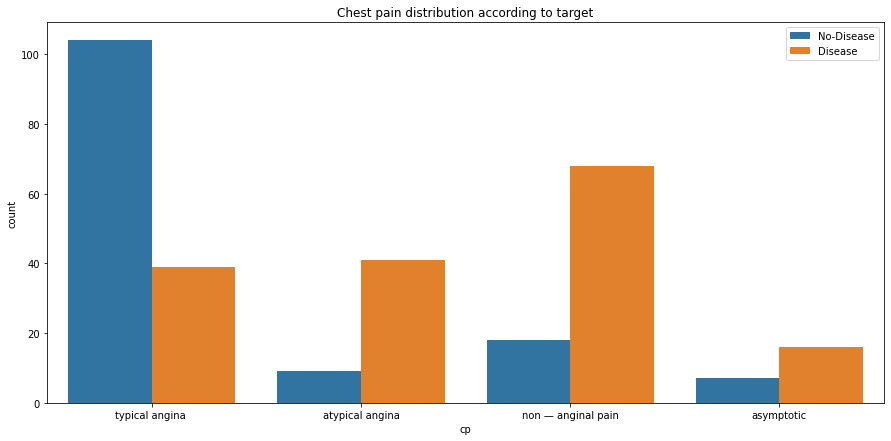

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(x="cp",hue="target", data=df)
plt.legend(labels=["No-Disease","Disease"])
plt.title("Chest pain distribution according to target")
plt.xticks([0,1,2,3],["typical angina ","atypical angina","non — anginal pain","asymptotic"])
plt.show()

#draw correlation matrix

<AxesSubplot:>

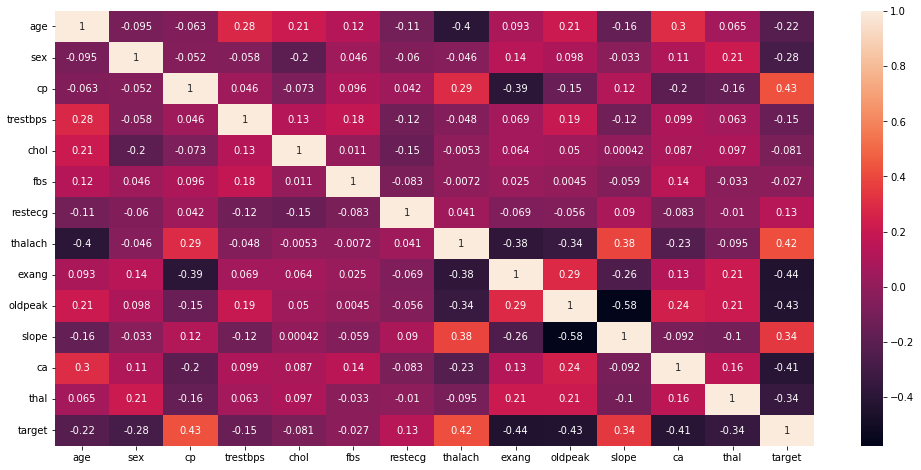

In [43]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True)

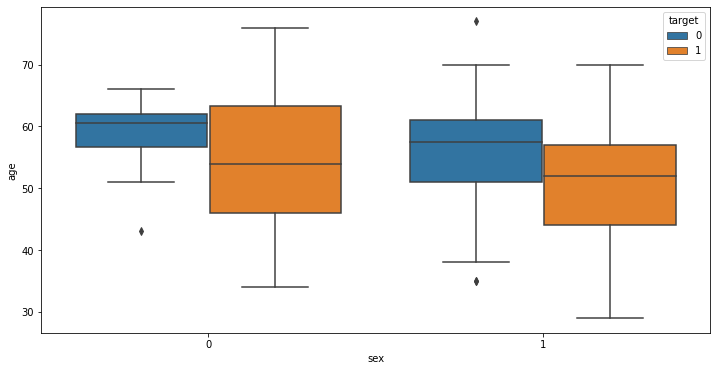

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["sex"],y=df["age"],hue=df["target"])
plt.show()

### confusion matrix before k-optimization

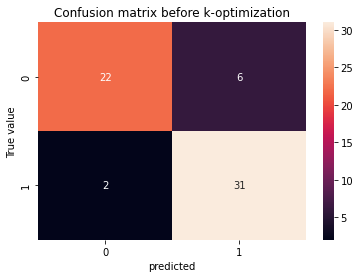

In [45]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)#annot=True to annotate cells
plt.xlabel("predicted")
plt.ylabel("True value")
plt.title("Confusion matrix before k-optimization")
plt.show()

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



### confusion matrix after k-optimization

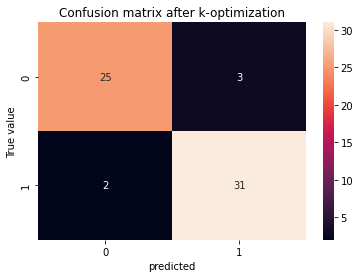

In [47]:
cm_mod=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm_mod,annot=True)
plt.xlabel("predicted")
plt.ylabel("True value")
plt.title("Confusion matrix after k-optimization")
plt.show()

In [48]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.91      0.94      0.93        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Heart Disease Prediction System using python GUI

In [49]:
from tkinter import *
from tkinter import ttk

root=Tk()

def predict():
    age=agevar.get()
    if sexvar.get()=="Male":
        sex=1
    else:
       sex=0
    if cpvar.get()=='Typical angina':
        cp=0
    elif cpvar.get()=='Atypical angina':
        cp=1
    elif cpvar.get()=='Non-anginal pain':
        cp=2
    else:
        cp=3
    trestbp=trestbpvar.get()
    chol=cholvar.get()

    if fbsvar.get()=='Yes':
        fbs=1
    else:
        fbs=0
    if restecgvar.get()=='nothing to note':
        restecg=0
    elif restecgvar.get()=='ST-T Wave abnormality':
        restecg=1
    else:
        restecg=2
    thalach=thalachvar.get()
    
    if exangvar.get()=='yes':
        exang=1
    else:
        exang=0
    oldpeak=oldpeakvar.get()
    
    if slopevar.get()=='Upsloping':
        slope=0
    elif slopevar.get()=='Flatsloping':
        slope=1
    else:
        slope=2
    if cavar.get()=='0':
        ca=0
    elif cavar.get()=='1':
        ca=1
    elif cavar.get()=='2':
        ca=2
    else:
        ca=3
    if thalvar.get()=='fixed defect':
        thal=1
    elif thalvar.get()=='normal':
        thal=2
    else:
        thal=3

    # print(age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal)
    # print(st.transform([[age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]))
    pkl_knn_model=pk.load(open('model/knn_heart_model.pkl','rb'))
    # ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
    result = pkl_knn_model.predict(st.transform([[age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]))
    if result== [0]:
        resvar.set("This person has not heart disease")
    else:
        resvar.set("This person has heart disease ")





def clear_field():
    age_entry.delete(0,END)
    sex_entry.delete(0,END)
    cp_entry.delete(0,END)
    trestbp_entry.delete(0,END)
    chol_entry.delete(0,END)
    fbs_entry.delete(0,END)
    restecg_entry.delete(0,END)
    thalach_entry.delete(0,END)
    exang_entry.delete(0,END)
    oldpeak_entry.delete(0,END)
    slope_entry.delete(0,END)
    ca_entry.delete(0,END)
    thal_entry.delete(0,END)


frame1=Frame(root,bg="#484848")
titlelbl=Label(frame1,text="Heart Disease Prediction System",font=("times new roman",30,"bold"),bg="#484848",fg="white")
titlelbl.pack(pady=7)
frame1.pack(side=TOP,fill=BOTH)

frame2=LabelFrame(root,bg="#F0F0F0",text="                                      CHECK YOUR HEART                                      ",
font=("Nyala",15,"bold"),bd=8)


age=Label(frame2,text="Age :",font=("times new roman",15,"bold"))
age.grid(row=0,column=0,sticky=E,pady=10,padx=20)
sex=Label(frame2,text="Gender :",font=("times new roman",15,"bold"))
sex.grid(row=0,column=2,sticky=E,pady=10,padx=20)

cp=Label(frame2,text="Chest Pain Type :",font=("times new roman",15,"bold"))
cp.grid(row=1,column=0,sticky=E,padx=20)
trestbp=Label(frame2,text="Resting Blood Pressure :",font=("times new roman",15,"bold"))
trestbp.grid(row=1,column=2,sticky=E,pady=5,padx=20)

chol=Label(frame2,text="Serum Cholestrol in mg/dl :",font=("times new roman",15,"bold"))
chol.grid(row=2,column=0,sticky=E,padx=20)
fbs=Label(frame2,text="Fasting Blood Sugar :",font=("times new roman",15,"bold"))
fbs.grid(row=2,column=2,sticky=E,padx=20)

restecg=Label(frame2,text="Resting Electrocardiographic :",font=("times new roman",15,"bold"))
restecg.grid(row=3,column=0,sticky=E,pady=5,padx=20)
thalach=Label(frame2,text="Maximum Heart Rate Achieved :",font=("times new roman",15,"bold"))
thalach.grid(row=3,column=2,sticky=E,pady=5,padx=20)

exang=Label(frame2,text="Exercise Induced Angina :",font=("times new roman",15,"bold"))
exang.grid(row=4,column=0,sticky=E,padx=20)
oldpeak=Label(frame2,text="Oldpeak :",font=("times new roman",15,"bold"))
oldpeak.grid(row=4,column=2,sticky=E,padx=20)

slope=Label(frame2,text="slope :",font=("times new roman",15,"bold"))
slope.grid(row=5,column=0,sticky=E,pady=5,padx=20)
ca=Label(frame2,text="Number of major vessels :",font=("times new roman",15,"bold"))
ca.grid(row=5,column=2,sticky=E,padx=20)

thal=Label(frame2,text="Thal :",font=("times new roman",15,"bold"))
thal.grid(row=6,column=0,sticky=E,padx=20)

# entry variables
agevar=StringVar()
sexvar=StringVar()
cpvar=StringVar()
trestbpvar=StringVar()
cholvar=StringVar()
fbsvar=StringVar()
restecgvar=StringVar()
thalachvar=StringVar()
exangvar=StringVar()
oldpeakvar=StringVar()
slopevar=StringVar()
cavar=StringVar()
thalvar=StringVar()

resvar=StringVar()


# Entry field
age_entry=Entry(frame2,font=("times new roman",12),width=22,textvariable=agevar,validate='key')
age_entry.grid(row=0,column=1,sticky=E,pady=5)
age_entry.insert(0,"Enter age here ?")
age_entry.bind("<FocusIn>",lambda args: age_entry.delete(0,END))

sex_choice=['Male','Female']
sex_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=sexvar,values=sex_choice)
sex_entry.grid(row=0,column=3,sticky=E,padx=25)
sex_entry.insert(0,"choice gender here ?")


cp_choice=['Typical angina','Atypical angina','Non-angina pain','Asymptomatic']
cp_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=cpvar,values=cp_choice)
cp_entry.grid(row=1,column=1,sticky=E)
cp_entry.insert(0,"choice chest pain type here ?")

trestbp_entry=Entry(frame2,font=("times new roman",12),width=22,textvariable=trestbpvar,validate='key')
trestbp_entry.grid(row=1,column=3,sticky=E,padx=25)
trestbp_entry.insert(0,"Enter tresting Blood Pressure here ?")
trestbp_entry.bind("<FocusIn>",lambda args: trestbp_entry.delete(0,END))


chol_entry=Entry(frame2,font=("times new roman",12),width=22,textvariable=cholvar,validate='key')
chol_entry.grid(row=2,column=1,sticky=E,pady=5)
chol_entry.insert(0,"serum cholestoral in mg/dl??")
chol_entry.bind("<FocusIn>",lambda args: chol_entry.delete(0,END))

fbs_choice=['Yes','No']
fbs_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=fbsvar,values=fbs_choice)
fbs_entry.grid(row=2,column=3,sticky=E,padx=25)
fbs_entry.insert(0,"fasting blood sugar > 120 mg/dl??")


restecg_choice=['Nothing to note','ST-T Wave abnormality','left ventricular hypertropy']
restecg_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=restecgvar,values=restecg_choice)
restecg_entry.grid(row=3,column=1,sticky=E)
restecg_entry.insert(0,"resting electrocardiographic results ???")

thalach_entry=Entry(frame2,font=("times new roman",12),width=22,textvariable=thalachvar)
thalach_entry.grid(row=3,column=3,sticky=E,padx=25)
thalach_entry.insert(0,"maximum heart rate ???")
thalach_entry.bind("<FocusIn>",lambda args: thalach_entry.delete(0,END))


exang_choice=['yes','no']
exang_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=exangvar,values=exang_choice)
exang_entry.grid(row=4,column=1,sticky=E)
exang_entry.insert(0,"exercise induced angina ?")

oldpeak_entry=Entry(frame2,font=("times new roman",12),width=22,textvariable=oldpeakvar,validate='key')
oldpeak_entry.grid(row=4,column=3,sticky=E,pady=5,padx=25)
oldpeak_entry.insert(0,"ST depression induced by exercise relative to rest")
oldpeak_entry.bind("<FocusIn>",lambda args: oldpeak_entry.delete(0,END))


slope_choice=['Upsloping','Flatsloping','Downsloping']
slope_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=slopevar,values=slope_choice)
slope_entry.grid(row=5,column=1,sticky=E)
slope_entry.insert(0,"the slope of the peak exercise ST segment??")

ca_choice=['0','1','2','3']
ca_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=cavar,values=ca_choice)
ca_entry.grid(row=5,column=3,sticky=E,padx=25)
ca_entry.insert(0,"number of major vessels(0-3)")

thal_choice=['fixed defect','normal','reversable defect']
thal_entry=ttk.Combobox(frame2,font=("times new roman",12),textvariable=thalvar,values=thal_choice)
thal_entry.grid(row=6,column=1,sticky=E)
thal_entry.insert(0,"choice thal here ??")

checkbtn=Button(frame2,text="predict",bd=4,width=10,font=("times new roman",16,"bold"),bg="green",fg="white",command=predict)
checkbtn.grid(row=7,column=1,pady=20)

clearbtn=Button(frame2,text="Clear",bd=4,width=10,font=("times new roman",16,"bold"),bg="#ff0055",fg="white",command=clear_field)
clearbtn.grid(row=7,column=2,pady=20)

res=Label(frame2,text="Result", font=("times new roman",15,"bold"),bg="white",fg="red",bd=7,textvariable=resvar)
res.grid(row=8,columnspan=3)

frame2.pack(side=LEFT,fill=BOTH,expand=True,pady=20)


root.geometry("1080x530+0+0")
root.title("Machine Learning project on Heart Disease Prediction")
root.resizable(0,0)

root.mainloop()

C:\Users\Amexo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Amexo\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Amexo\AppData\Local\Temp\ipykernel_3808\3450813831.py", line 66, in predict
    result = pkl_knn_model.predict(st.transform([[age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]))
  File "C:\Users\Amexo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py", line 975, in transform
    X = self._validate_data(
  File "C:\Users\Amexo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 577, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "C:\Users\A